# Lead in the Water

For my dataset, I decided to analyze neighborhoods based on likelihood of childhood lead exposure. Obviously, for a neighborhood to be suitable to raise kids, there should be a very low chance of lead exposure (ideally none!).

The WPRDC helpfully has historical data going back to 2015, with a column in their dataset ('percentEBLL15_20') representing the total positive cases divided by the number of children tested, as a percent. Because the data is representative only of *tested cases* and is **not** therefore necessarily indicative of lead levels across the entire population of a given neighborhood. This, combined with the fact that before 2018 testing was not mandatory for all children, means that the data may be skewed to the high end, as many cases might have been tested only as the result of some concern.

For our purposes of attemting to compare neighborhoods however, this is of little concern. The same forces will likely be acting upon the city at large, and 

In [8]:
# Necessary imports
import pandas as pd
import geopandas as gp
%matplotlib inline

# Read Shapefile which will determine the data we pull from the EBLL file
nb = gp.read_file("neighborhoods/Neighborhoods_.shp")

# Create Dataframe of lead levels
ell = pd.read_csv("elevated-blood-lead-levels.csv")

# Insert column to merge on in neighborhoods geodata
nb.insert(0,"tract",nb['tractce10'].astype("Int64", errors='ignore').fillna(0))

# Insert column to merge on in lead level dataframe
ell.insert(0,"tract",(ell["CensusTract"]-42003000000))

# Merge the data from lead levels dataframe onto neighborhoods dataframe
ellnb = nb.merge(ell, how="left", on="tract")

<AxesSubplot:>

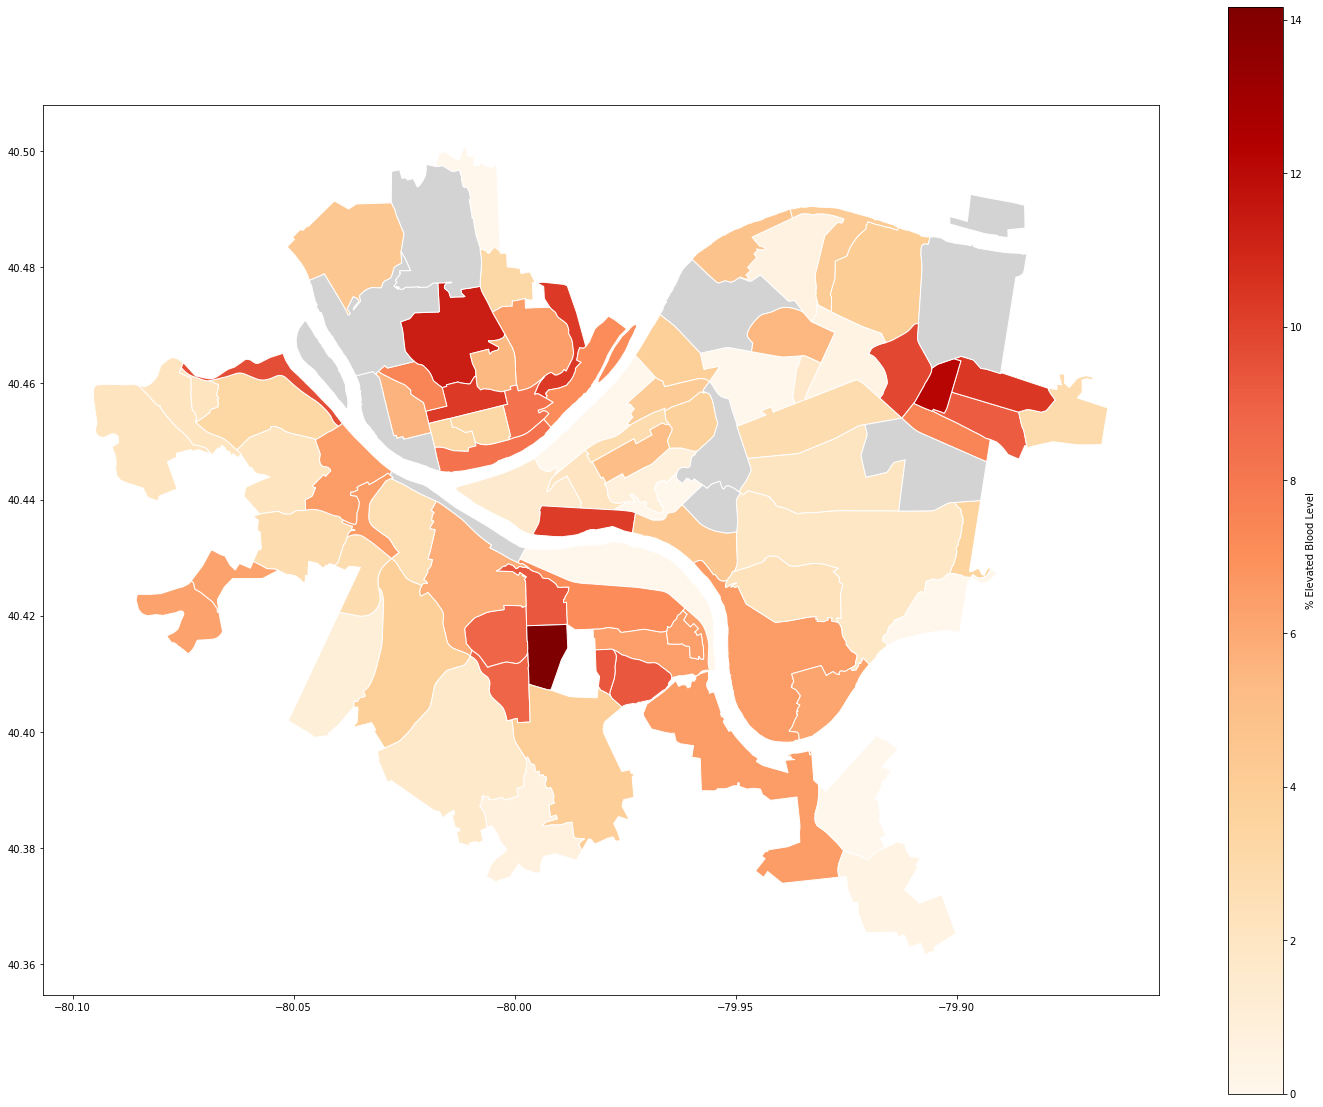

In [7]:
# Plot the data on a map for ease of viewing
ellnb.plot(column='percentEBLL15_20', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "% Elevated Blood Level"}, # label the legend
               figsize=(25, 20),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )